In [42]:
from modules.stats_v3 import *
from modules.helper_functions_v3 import *
from modules.plot_functions_v3 import *

import random

import __main__
from sys import argv

In [43]:
plot_pretty()

In [48]:
suite_name = 'caterpillar_19_LX14'
#suite_name = 'iBurr'
saveimage = False
executed_as_300kpc = True
executed_as_python = hasattr(__main__, '__file__')

seed = random.randint(0, 100000)

if executed_as_python:
    import matplotlib
    matplotlib.use('Agg')
    saveimage = True
    suite_name = argv[1]
    executed_as_300kpc = argv[2]=='1'

select_by_Rvir = not executed_as_300kpc
name_extension = "_300kpc" if executed_as_300kpc else ""

base_dir = '../data'
gen_data_dir  = base_dir + '/gendata'
if suite_name[0] == 'i':
  suite_dir = base_dir + '/elvis_isolated'
  suite_name_decorated = elvis_name_template.substitute(suite_name=suite_name)
  data_dir = gen_data_dir + f'/log_elvis_isolated{name_extension}_v3'
  data_surv_probs_dir =  gen_data_dir +  f'/log_elvis_isolated{name_extension}_surv_probs_v3'
  save_dir = base_dir + f'/result_v3/elvis_isolated{name_extension}/{suite_name}'
  brightest_dir = gen_data_dir + f'/log_brightest_elvis_isolated{name_extension}_v3.1'
else:
  suite_dir = base_dir + '/caterpillar_zrei8_5_fix'
  suite_name_decorated = caterpillar_name_template.substitute(suite_name=suite_name)
  data_dir = gen_data_dir + f'/log_caterpillar{name_extension}_v3'
  data_surv_probs_dir = gen_data_dir + f'/log_caterpillar{name_extension}_surv_probs_v3'
  save_dir = base_dir + f'/result_v3/caterpillar{name_extension}/{suite_name}'
  brightest_dir = gen_data_dir + f'/log_brightest_caterpillar{name_extension}_v3.1'

In [49]:
data = read_halo(suite_name_decorated, suite_dir)

In [50]:
plot_distribution_D_rms_dispersion(suite_name, data_dir, data_surv_probs_dir, data, brightest_dir=brightest_dir, select_by_Rvir=select_by_Rvir, seed=seed, save_dir=save_dir, saveimage=saveimage)

FileNotFoundError: [Errno 2] No such file or directory: '../data/gendata/log_caterpillar_300kpc_v3/caterpillar_19_LX14.csv'

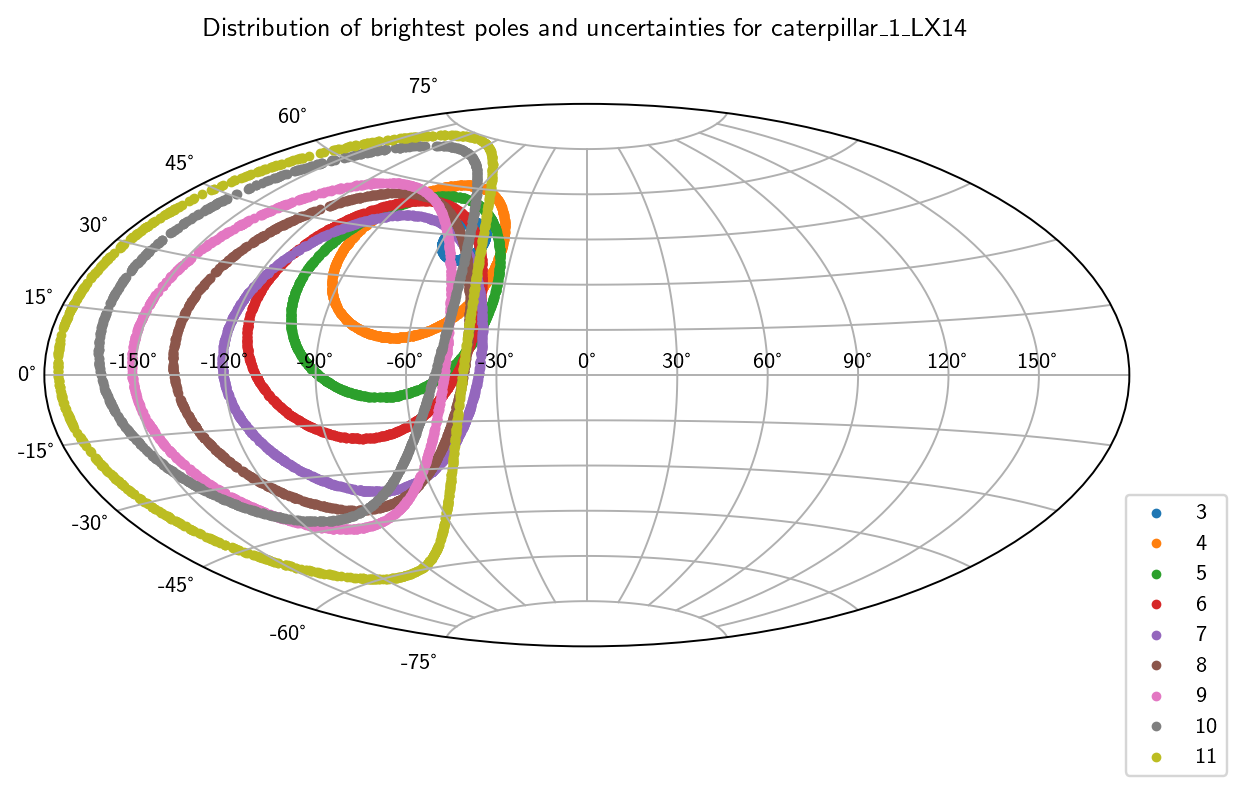

In [30]:
plot_poles_brightest(suite_name, data, select_by_Rvir=select_by_Rvir, seed=seed, save_dir=save_dir, saveimage=saveimage)

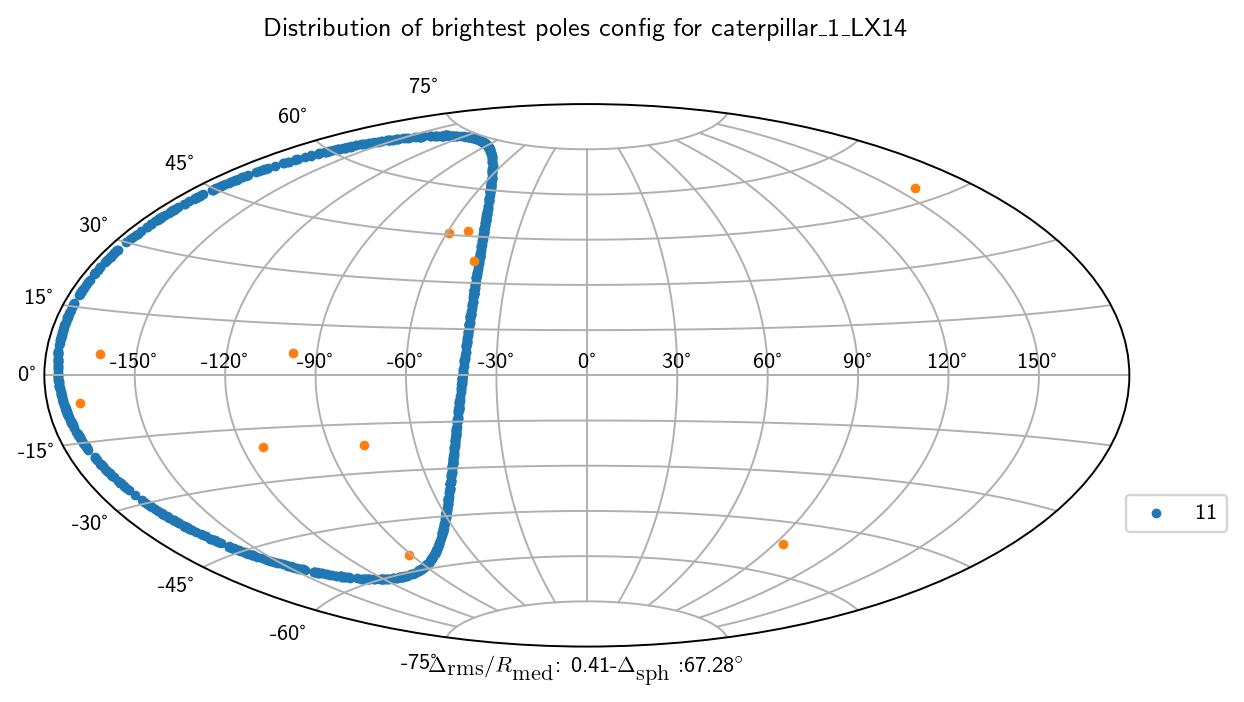

In [31]:
plot_poles_brightest_with_config(suite_name, data, select_by_Rvir=select_by_Rvir, seed=seed, save_dir=save_dir, saveimage=saveimage)

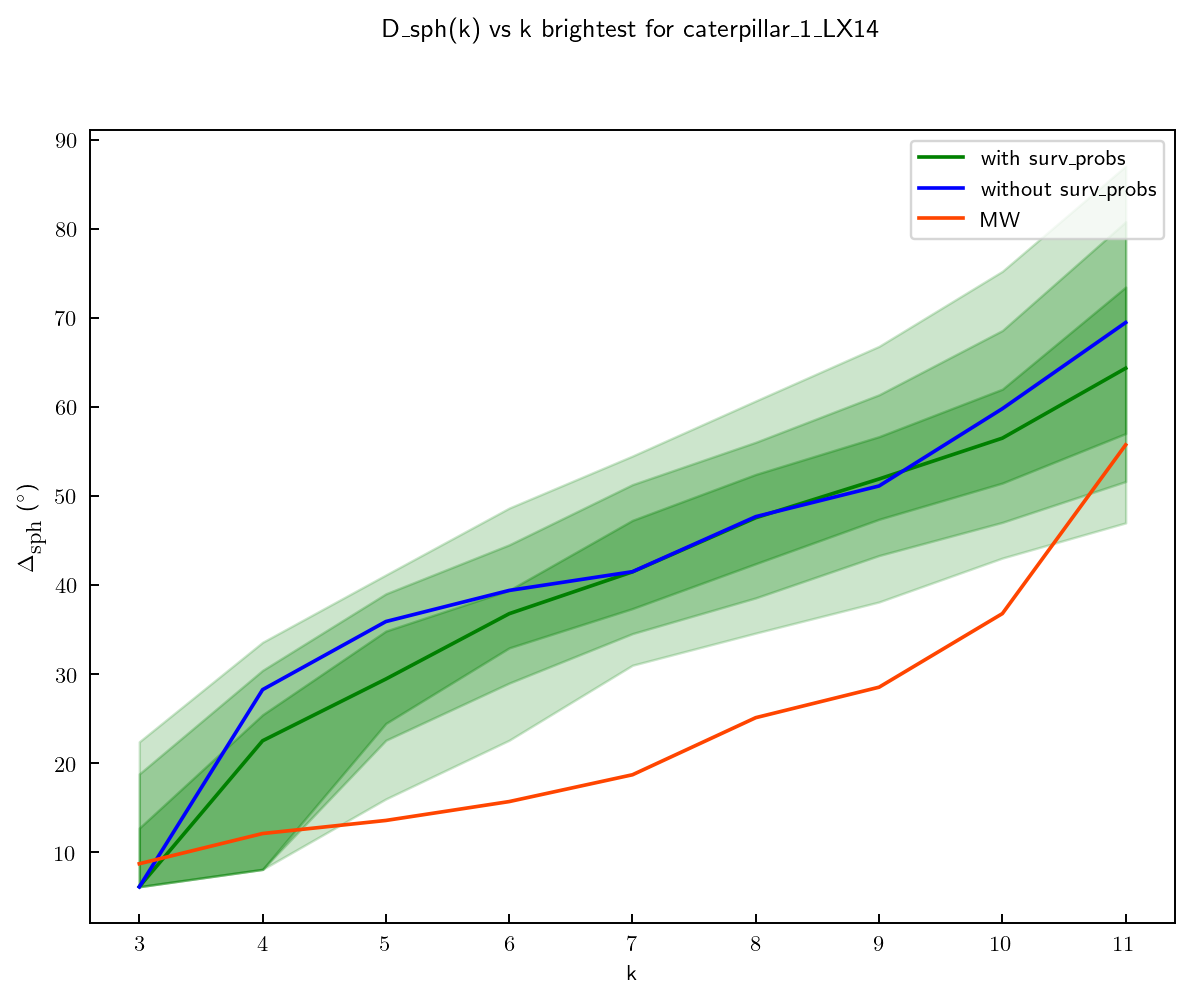

In [47]:
plot_D_sph_vs_k_brightest(suite_name, data, brightest_dir=brightest_dir, select_by_Rvir=select_by_Rvir, seed=seed, save_dir=save_dir, saveimage=saveimage)

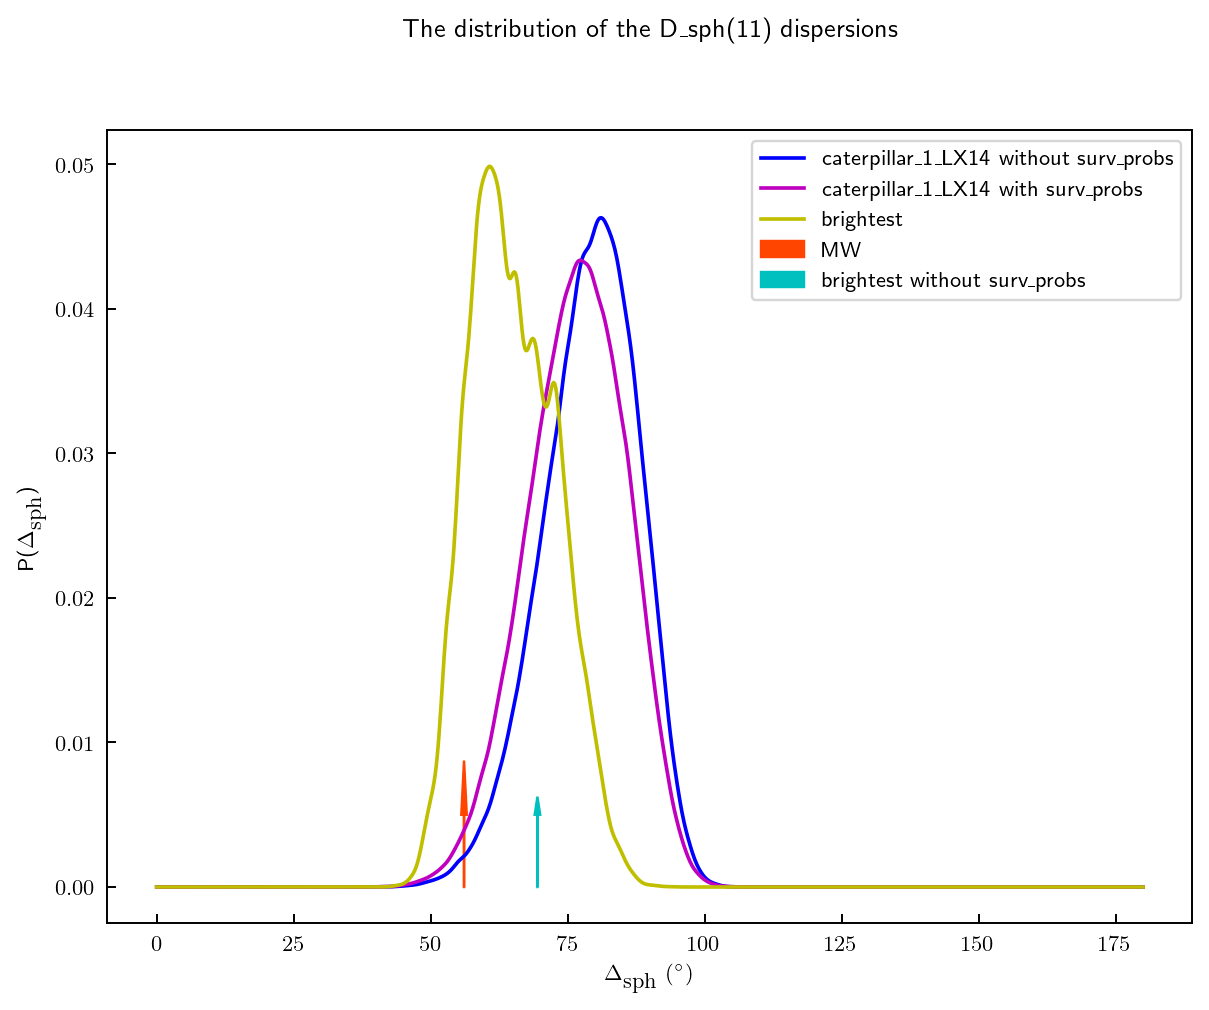

In [33]:
plot_distribution_D_sph_dispersion(suite_name, data_dir, data_surv_probs_dir, data, brightest_dir=brightest_dir, select_by_Rvir=select_by_Rvir, seed=seed, save_dir=save_dir, saveimage=saveimage)

C:\Users\akrav\Documents\prj\2205_sat_anisotropy\src\modules\plot_functions_v3.py:65: UserWarning: Log scale: values of z <= 0 have been masked
  ax.contour(X, Y, H, linewidths=(1.0,0.75, 0.5, 0.25), colors='black', levels = sorted(lvls),


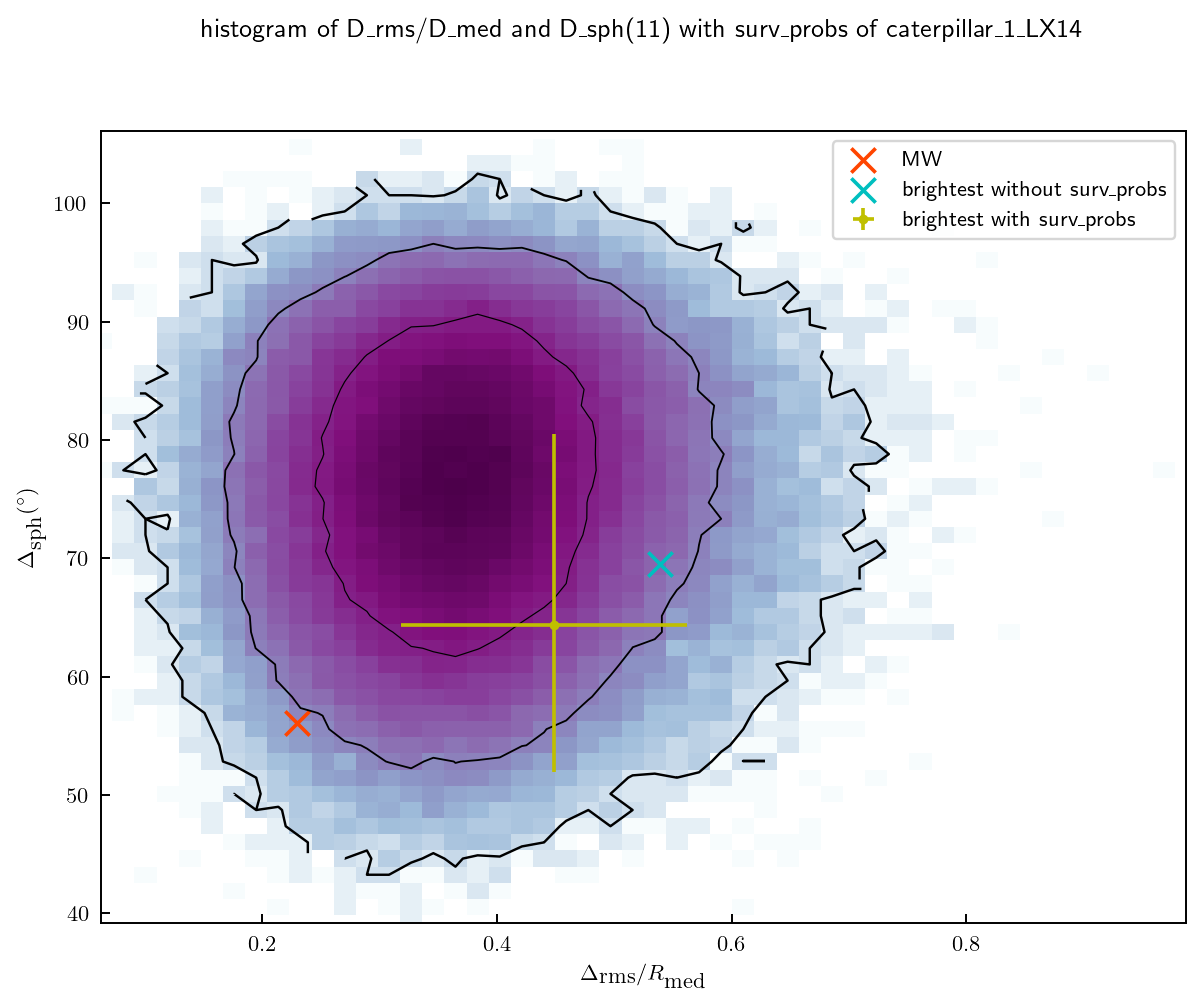

In [34]:
plot_hist_D_rms_over_R_med_vs_D_sph(suite_name, data_surv_probs_dir, data, brightest_dir=brightest_dir, is_surv_probs=True, k=11, select_by_Rvir=select_by_Rvir, seed=seed, save_dir=save_dir, saveimage=saveimage)

C:\Users\akrav\Documents\prj\2205_sat_anisotropy\src\modules\plot_functions_v3.py:65: UserWarning: Log scale: values of z <= 0 have been masked
  ax.contour(X, Y, H, linewidths=(1.0,0.75, 0.5, 0.25), colors='black', levels = sorted(lvls),


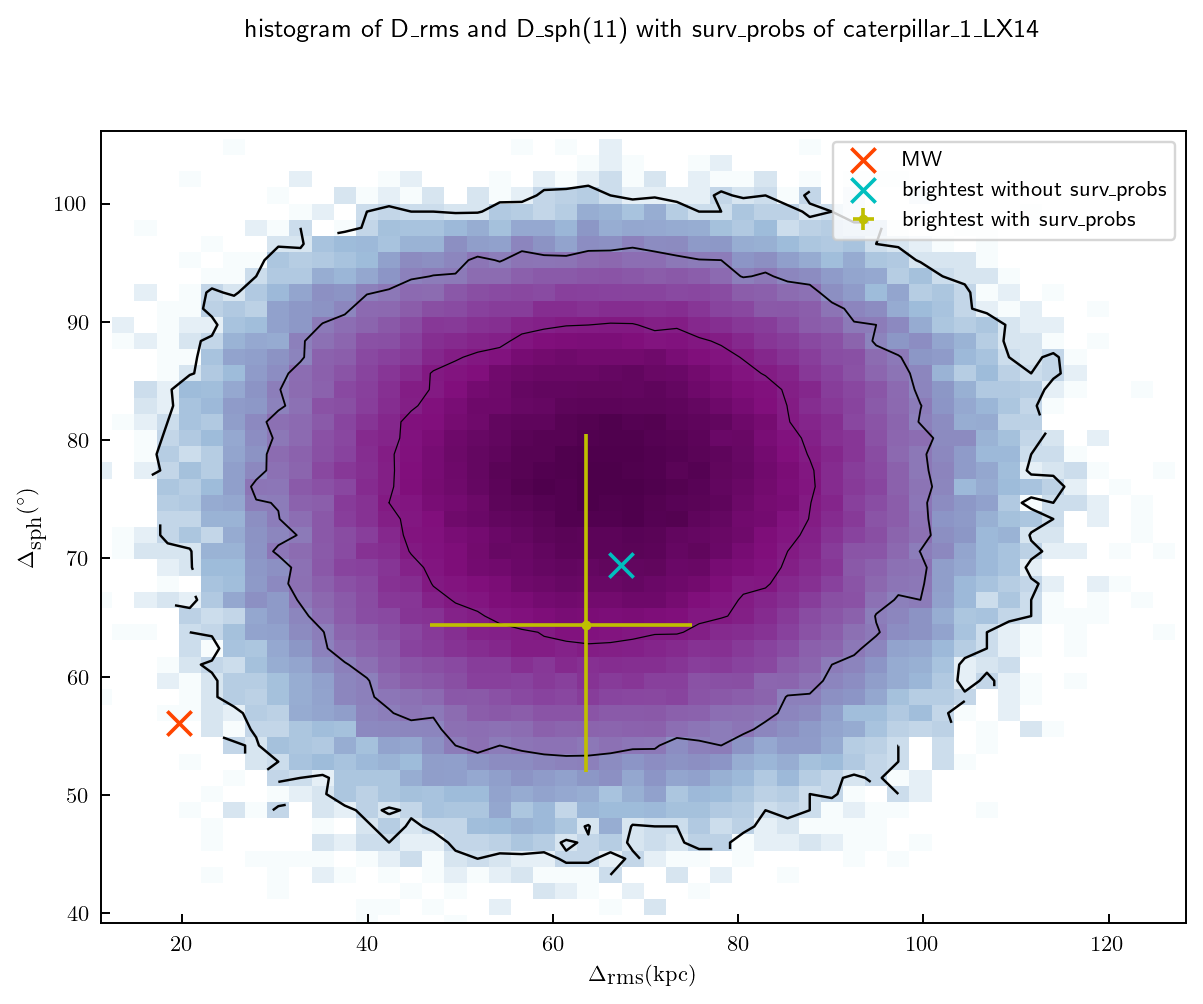

In [35]:
plot_hist_D_rms_vs_D_sph(suite_name, data_surv_probs_dir, data, brightest_dir=brightest_dir, is_surv_probs=True, k=11, select_by_Rvir=select_by_Rvir, seed=seed, save_dir=save_dir, saveimage=saveimage)

C:\Users\akrav\Documents\prj\2205_sat_anisotropy\src\modules\plot_functions_v3.py:65: UserWarning: Log scale: values of z <= 0 have been masked
  ax.contour(X, Y, H, linewidths=(1.0,0.75, 0.5, 0.25), colors='black', levels = sorted(lvls),


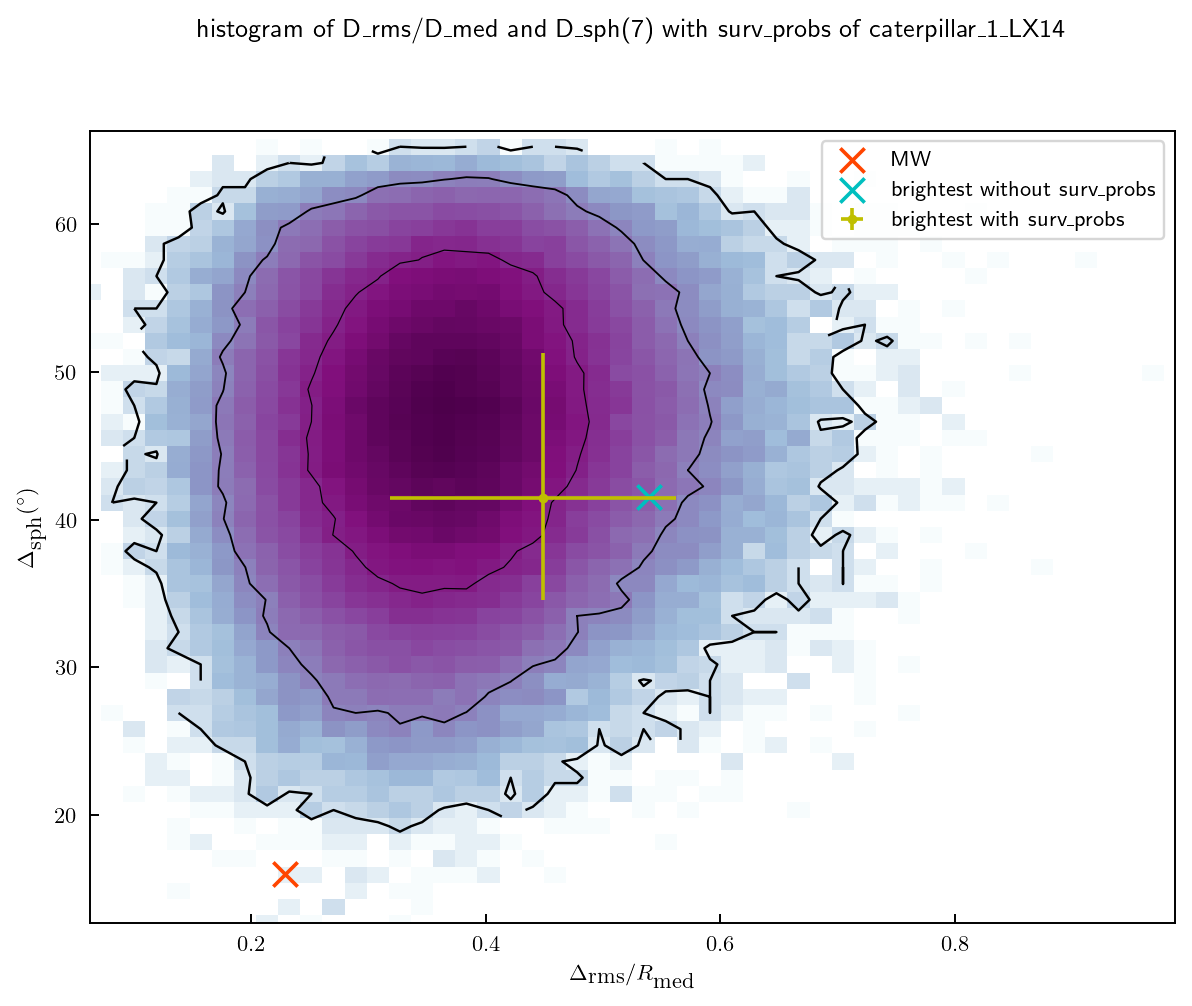

In [36]:
plot_hist_D_rms_over_R_med_vs_D_sph(suite_name, data_surv_probs_dir, data, brightest_dir=brightest_dir, is_surv_probs=True, k=7, select_by_Rvir=select_by_Rvir, seed=seed, save_dir=save_dir, saveimage=saveimage)

C:\Users\akrav\Documents\prj\2205_sat_anisotropy\src\modules\plot_functions_v3.py:65: UserWarning: Log scale: values of z <= 0 have been masked
  ax.contour(X, Y, H, linewidths=(1.0,0.75, 0.5, 0.25), colors='black', levels = sorted(lvls),


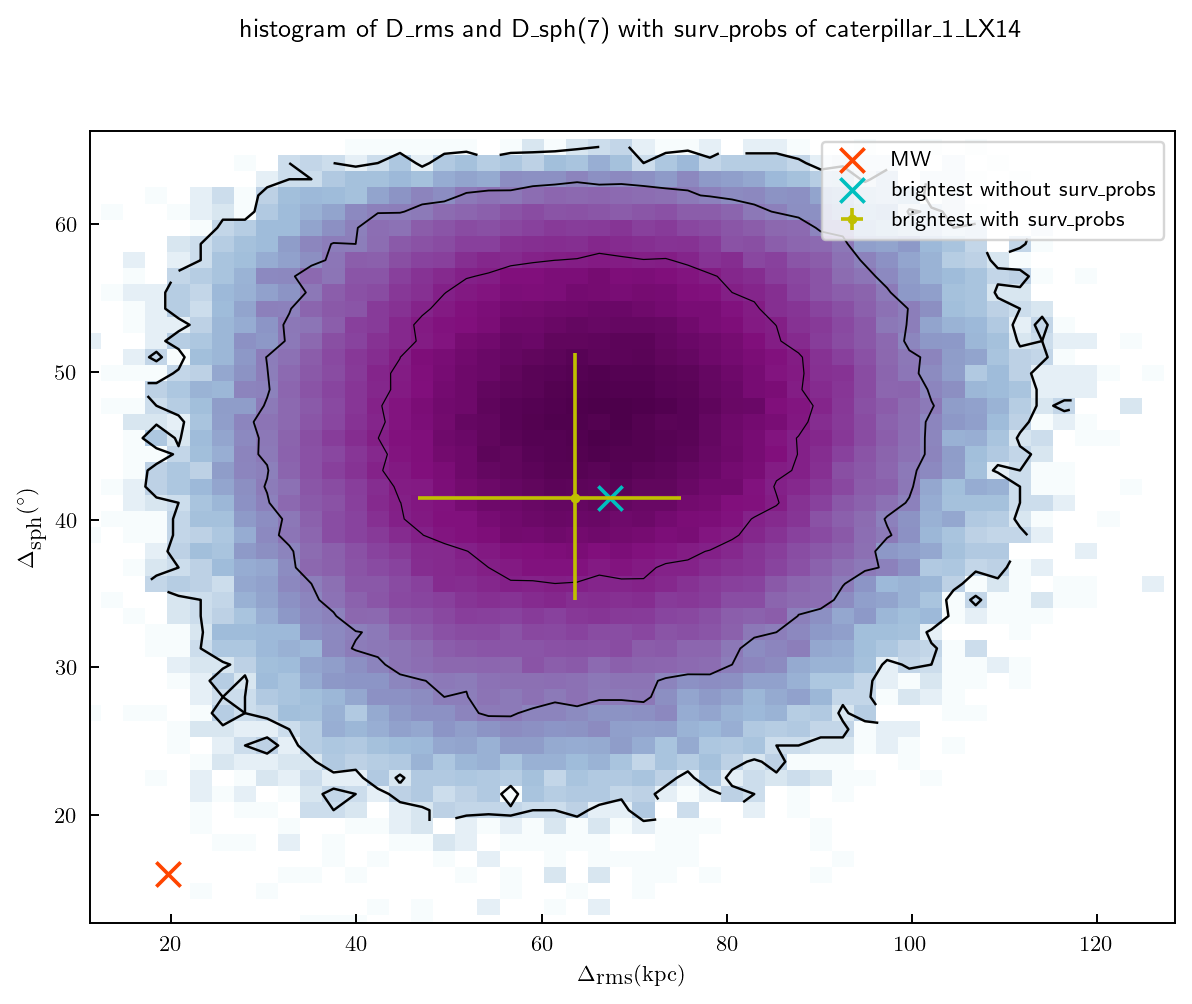

In [37]:
plot_hist_D_rms_vs_D_sph(suite_name, data_surv_probs_dir, data, brightest_dir=brightest_dir, is_surv_probs=True, k=7, select_by_Rvir=select_by_Rvir, seed=seed, save_dir=save_dir, saveimage=saveimage)

In [14]:
# data_with_surv_probs = read_specific(data, is_surv_probs=True, select_by_Rvir=False)

# r_with_surv_probs = np.sum(data_with_surv_probs['pos']**2, axis=-1)**(1/2)

# data_without_surv_probs = read_specific(data, is_surv_probs=False, select_by_Rvir=False)

# r_without_surv_probs = np.sum(data_without_surv_probs['pos']**2, axis=-1)**(1/2)

# print("with surv_probs:", np.median(r_with_surv_probs))
# print("d_rms in kpc: ", get_smallest_D_rms(data_with_surv_probs['pos'])['D_rms'])
# print("d_sph in degrees: ", to_degree(get_D_sph(data_with_surv_probs['poles'])['D_sph']))
# print("")
# print("without surv_probs:", np.median(r_without_surv_probs))
# print("d_rms in kpc: ", get_smallest_D_rms(data_without_surv_probs['pos'])['D_rms'])
# print("d_sph in degrees: ", to_degree(get_D_sph(data_without_surv_probs['poles'])['D_sph']))